In [112]:
import numpy as np
import pandas as pd

df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [15]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [20]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Checking Null Values

In [21]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [33]:
features = [features for features in df.columns if df[features].isnull().sum()>0] 
if features==[]:
    print('No Null Values Found')

No Null Values Found


<AxesSubplot:>

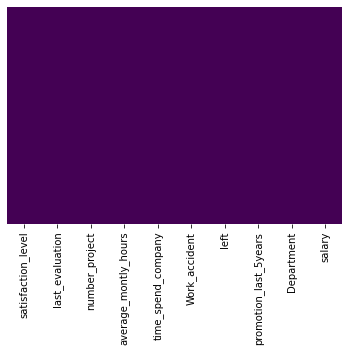

In [41]:
import seaborn as sns
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [46]:
Department_name = df.Department.value_counts().index
Department_name

Index(['sales', 'technical', 'support', 'IT', 'product_mng', 'marketing',
       'RandD', 'accounting', 'hr', 'management'],
      dtype='object')

In [48]:
Department_val = df.Department.value_counts().values
Department_val

array([4140, 2720, 2229, 1227,  902,  858,  787,  767,  739,  630])

# Exploratory Visualisation

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


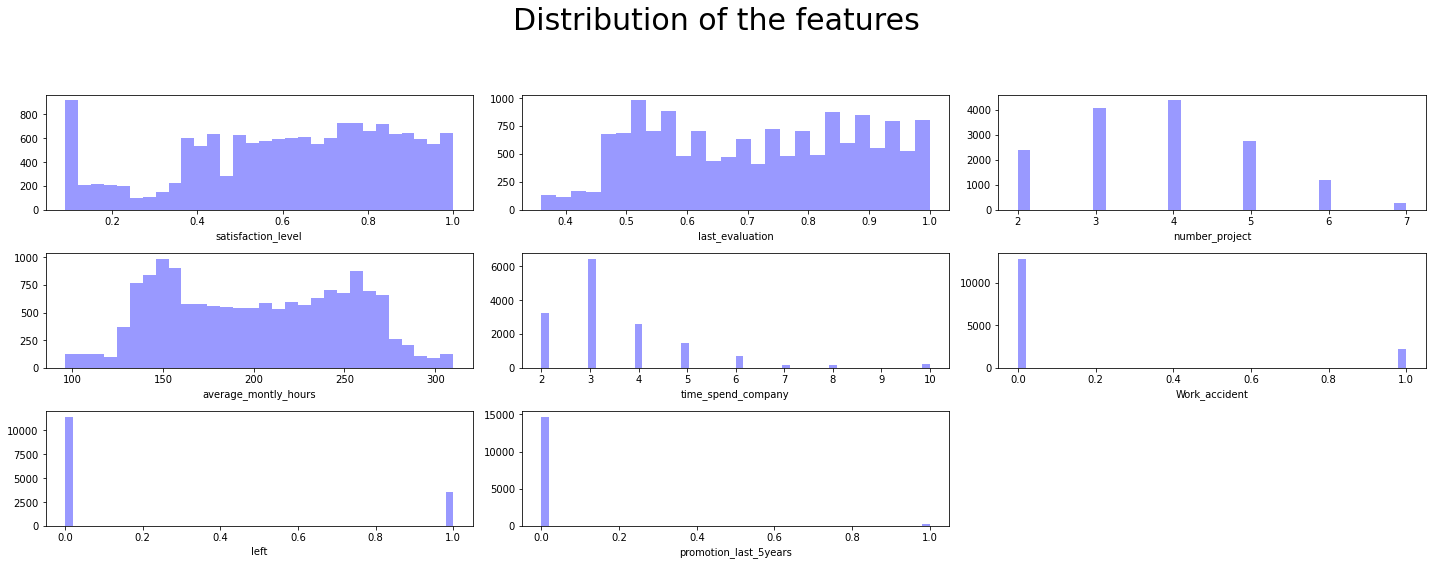

In [137]:
# Data distribution for the features :
df_float = df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years']]
fig = plt.figure(figsize=(20, 17))
plt.suptitle('Distribution of the features', fontsize=30)

for i in range(df_float.shape[1]):
    plt.subplot(7, 3, i+1)
    sns.distplot(df_float[df_float.columns[i]], color='blue', kde=False)
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

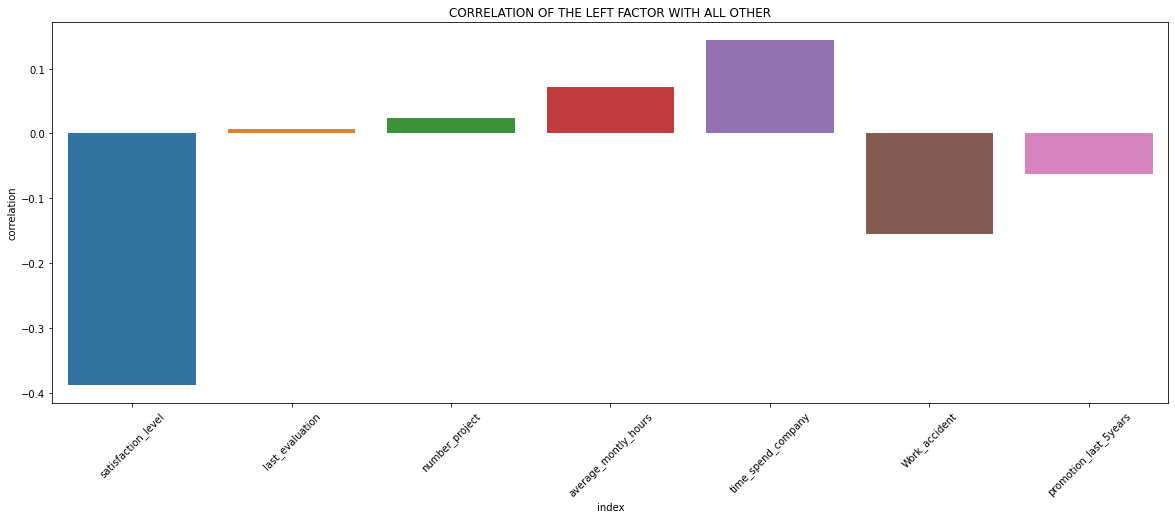

In [134]:
# Understanding correlation between other features and 'left':

corr_df = pd.DataFrame(df_float.drop(columns=['left']).corrwith(df_float['left']), columns=['correlation']).reset_index()
plt.figure(figsize=(20, 7))
sns.barplot(x=corr_df['index'], y=corr_df['correlation'])
plt.xticks(rotation=45)
plt.title("CORRELATION OF THE LEFT FACTOR WITH ALL OTHER")
plt.show()

### Here satisfaction_level shows strong correlation with the 'left' feature

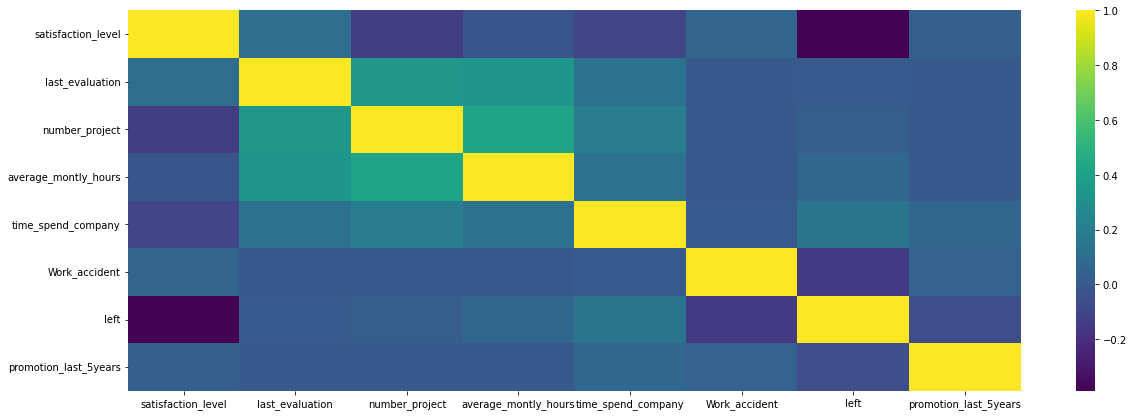

In [144]:
# visualizing a heatmap of correlation of features with each other

plt.figure(figsize=(20, 7))
sns.heatmap(df_float.corr(), cmap='viridis')
plt.show()

In [138]:
# plt.pie(Department_val,labels=Department_name,autopct='%1.2f%%')
# plt.title('Statistics of People Belong to Different Departments of The Company')
# plt.show()

In [64]:
left = df[df['left']==1]

In [139]:
left.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [140]:
# stay.head(2)

In [77]:
left_company_name = left.Department.value_counts().index
left_company_val = left.Department.value_counts().values
# stay_company_name = stay.Department.value_counts().index
# stay_company_val = stay.Department.value_counts().values

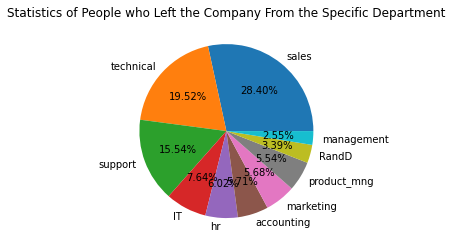

In [141]:
plt.pie(left_company_val,labels=left_company_name,autopct='%1.2f%%')
plt.title('Statistics of People who Left the Company From the Specific Department')
plt.show()
# plt.pie(stay_company_val,labels=stay_company_name,autopct='%1.2f%%')
# plt.title('Statistics of People who Stay the Company From the Specific Department')
# plt.show()

In [87]:
left_salary_index = left.salary.value_counts().index
left_salary_val = left.salary.value_counts().values

In [101]:
left_salary_percentage = [(item*100)/(sum(left_salary_val)) for item in left_salary_val]

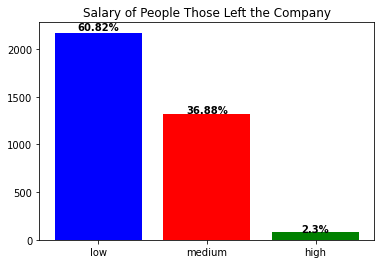

In [105]:
colors_list = ['Blue','Red', 'Green']
graph = plt.bar(left_salary_index, left_salary_val,color = colors_list)
plt.title('Salary of People Those Left the Company')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round(left_salary_percentage[i],2))+'%',
             ha='center',
             weight='bold')
    i+=1

plt.show()

# Data Preprocessing

In [146]:
!pip install sklearn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 2.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 kB 2.2 MB/s eta 0:00:00a 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=ca1c052367c07ba88383606509ff24afa6c854a435d9db77395de16e908dd3d0
  Stored in directory: /Users/vikramdev/Library/Caches/pip/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://

In [157]:
#Since the Department and Salary Columns have string data so first we will convert that into int data

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label = [le.fit_transform(df[col]) for col in ['Department', 'salary']]

In [158]:
data = df.drop(['Department', 'salary'], axis = 'columns')

In [160]:
data.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0


In [163]:
i=0
for col in ['Department', 'salary']:
    data[col]=label[i]
    i=i+1
data.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2


In [166]:
from sklearn.model_selection import train_test_split

In [244]:
X = data.iloc[:,[i for i in range(0,10) if i!=6]] 
Y = data.iloc[:,[6]]

In [245]:
X.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2


In [249]:
Y.head(2)

,left
0,1
1,1


In [250]:
#Since the range of the different features have high variations, will use MinMaxScalar to normalise the data

from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler().fit(X.iloc[:,[2,3,4,7,8]])
scaler = MinMaxScaler().fit(X)

In [251]:
X = scaler.transform(X)

In [327]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 40)
Y_train, Y_test = np.array(Y_train).ravel(), np.array(Y_test).ravel()

In [253]:
pd.DataFrame(X_train).head(2)

,0,1,2,3,4,5,6,7,8
0,0.736264,0.828125,0.6,0.775701,0.375,0.0,0.0,0.777778,0.5
1,0.593407,0.953125,0.6,0.233645,0.125,0.0,0.0,0.888889,0.5


# Implementation
## 1. Logistic Regression Model

In [329]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression().fit(X_train, Y_train)

In [330]:
lr_model.predict_proba(X_test)

array([[0.89449852, 0.10550148],
       [0.86900999, 0.13099001],
       [0.58099014, 0.41900986],
       ...,
       [0.80890676, 0.19109324],
       [0.8293912 , 0.1706088 ],
       [0.84072481, 0.15927519]])

In [331]:
lr_model.score(X_test, Y_test)

0.762

## 2. Decision Tree Model

In [332]:
from sklearn import tree
t_model = tree.DecisionTreeClassifier().fit(X_train, Y_train)

In [333]:
t_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [334]:
t_model.score(X_test,Y_test)

0.9746666666666667

## 3. Support Vector Machine Model

In [335]:
from sklearn import svm
svm_model = svm.SVC(kernel='rbf').fit(X_train, Y_train)

In [336]:
svm_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [337]:
svm_model.score(X_test, Y_test)

0.953

## 4. Neural Network Model

In [301]:
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
# temp = 0
# for i in range(10,100,10):
#     for j in range(i+10,100,10):
#         nnm_model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(i, j), 
#                                   random_state=1).fit(X_train, Y_train)
#         if nnm_model.score(X_test,Y_test)>temp:
#             hidden_layer_size = (i,j)
#             temp = nnm_model.score(X_test,Y_test)              

In [302]:
# scaler = preprocessing.StandardScaler().fit(X_train)

In [303]:
# X_scaled = scaler.transform(X_train)

In [339]:
nnm_model = MLPClassifier(solver='adam', alpha=0.00001, hidden_layer_sizes=(20,60),max_iter=5000,
                                   random_state=40).fit(X_train, Y_train)

In [340]:
nnm_model.score(X_test, Y_test)

0.9733333333333334

## 5. KNN Model

In [341]:
from sklearn import neighbors

In [343]:
knn_model = neighbors.KNeighborsClassifier(n_neighbors=3).fit(X_train, Y_train)

In [345]:
knn_model.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [346]:
knn_model.score(X_test,Y_test)

0.9596666666666667

In [347]:
y_pred = knn_model.predict(X_test)

In [350]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, y_pred)
accuracy

0.9596666666666667

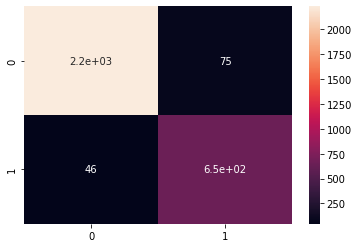

In [355]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test, y_pred)

sns.heatmap(matrix, annot = True)
plt.show()

## Saving the Models

In [360]:
import pickle
  
# Save the trained model as a pickle string.
saved_model_pickle = pickle.dumps(knn_model)

In [366]:
from joblib import Parallel, delayed
import joblib

# Save the model as a pickle in a file
joblib.dump(knn_model, 'knn_model.pkl')

['knn_model.pkl']

## Loading the Models

In [364]:
# Load the pickled model
knn_model_load = pickle.loads(saved_model_pickle)
  
# Use the loaded pickled model to make predictions
knn_model_load.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [365]:
# Load the model from the file
knn_from_joblib = joblib.load('knn_model.pkl')
  
# Use the loaded model to make predictions
knn_from_joblib.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])